In [16]:
import sys
sys.path.append('../')
from ompl import base as ob
from ompl import geometric as og
from ompl import util as ou

from panav.environment.env import MultiTunnelEnv
from panav.viz import draw_env

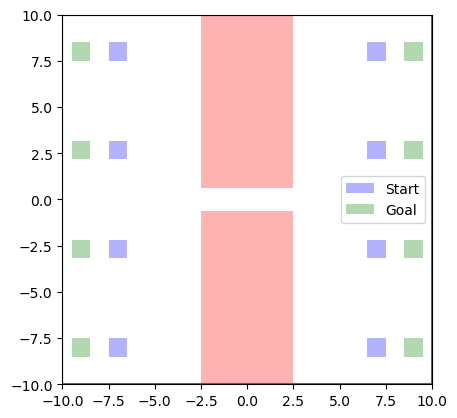

In [153]:
bloating_r = 0.5
vmax = 1.0

N = 8
limits = [(-10,10),(-10,10)] 
n_tunnel = 1

TIMEOUT = 100 # timeout

env = MultiTunnelEnv(n_tunnel = n_tunnel, tunnel_width = bloating_r*2.5,limits=limits, N_agent = N)
draw_env(env)

In [154]:
space_dim = 2
bounds = ob.RealVectorBounds(space_dim)

for axis in range(space_dim):
    bounds.setLow(axis,min(limits[axis]))
    bounds.setHigh(axis,max(limits[axis]))
    
space = ob.RealVectorStateSpace(space_dim)
space.setBounds(bounds)
# spaceTime = ob.SpaceTimeStateSpace(space,vmax)

In [155]:
si = ob.SpaceInformation(space)


In [156]:
import numpy as np
from panav.RRT.utils import has_line_collision
def state_to_py(s,space_dim = 2):
    return np.array([s[i] for i in range(space_dim)])

def path_to_py(path,space_dim = 2):
    vs = path.getStates()
    n_states = path.getStateCount()
    out = [state_to_py(vs[i],space_dim) for i in range(n_states)]
    return np.array(out).T

class Validator(ob.MotionValidator):
    def __init__(self,si,env,bloating_r):
        super().__init__(si)
        self.env = env
        self.bloating_r = bloating_r
    def checkMotion(self,s1,s2):
        x1 = state_to_py(s1)
        x2 = state_to_py(s2)
        return not has_line_collision(self.env,x1,x2,self.bloating_r)

# Set the object used to check which states in the space are valid
validityChecker = Validator(si,env,bloating_r)
si.setMotionValidator(validityChecker)

si.setup()

         at line 63 in /Users/tianpengzhang/Desktop/ompl/src/ompl/base/src/SpaceInformation.cpp


In [216]:
# Set our robot's starting state to be the bottom-left corner of
# the environment, or (0,0).

def py_to_state(s,space):
    space_dim = len(s)
    x = ob.State(space)
    for i in range(space_dim):
        x[i] = s[i]
    return x

# planner = og.STRRTstar(si)
planner = og.RRTstar(si)

start = py_to_state(env.starts[0],space)
goal = py_to_state(env.goals[0],space)


# Create a problem instance
pdef = ob.ProblemDefinition(si)

# Set the start and goal states
pdef.setStartAndGoalStates(start, goal, bloating_r)

pdef.setOptimizationObjective(ob.PathLengthOptimizationObjective(si))

def intermediateSol(p,spath,best_cost):
    print(spath,best_cost.value())
    return spath, best_cost.value()
pdef.setIntermediateSolutionCallback(ob.ReportIntermediateSolutionFn(intermediateSol))

optimizingPlanner = planner

# Set the problem instance for our planner to solve
optimizingPlanner.setProblemDefinition(pdef)
optimizingPlanner.setup()

# term_condition = ob.exactSolnPlannerTerminationCondition(pdef)
# attempt to solve the planning problem in the given runtime

def exactSolutionReached()->bool:
    path = pdef.getSolutionPath()
    if path is not None:
        path = path_to_py(path)
        dist2goal = np.linalg.norm(path[:,-1]-env.goals[0])
        print(dist2goal)
    return pdef.hasSolution()

term_condition = ob.PlannerTerminationCondition(ob.PlannerTerminationConditionFn(exactSolutionReached))
solved = optimizingPlanner.solve(term_condition)

Debug:   RRTstar: Planner range detected to be 5.656854
Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 25


/Users/tianpengzhang/opt/miniconda3/envs/PA-NAV/lib/python3.11/site-packages/shapely/measurement.py:74: RuntimeWarning: invalid value encountered in distance
  return lib.distance(a, b, **kwargs)


<ompl.base._base.vectorConstState object at 0x137b57d10>Info:    RRTstar: Found an initial solution with a cost of 25.53 in 2124 iterations (669 vertices in the graph)
 25.526176215893685
<ompl.base._base.vectorConstState object at 0x137b57d10> 25.495038266217307
<ompl.base._base.vectorConstState object at 0x137b57d10> 25.134944099838695
<ompl.base._base.vectorConstState object at 0x137b57d10> 25.11041058321369
<ompl.base._base.vectorConstState object at 0x137b57d10> 24.95400068652359
<ompl.base._base.vectorConstState object at 0x137b57d10> 24.900770731039078
<ompl.base._base.vectorConstState object at 0x137b57d10> 24.838439189118308
<ompl.base._base.vectorConstState object at 0x137b57d10> 24.81401637933239
<ompl.base._base.vectorConstState object at 0x137b57d10> 24.801165531558933
<ompl.base._base.vectorConstState object at 0x137b57d10> 24.50225900637007
<ompl.base._base.vectorConstState object at 0x137b57d10> 24.50120345072828
<ompl.base._base.vectorConstState object at 0x137b57d10> 

KeyboardInterrupt: 

In [211]:
f()

ArgumentError: Python argument types in
    ReportIntermediateSolutionFn_t.__call__(ReportIntermediateSolutionFn_t)
did not match C++ signature:
    __call__(std::__1::function<void (ompl::base::Planner const*, std::__1::vector<ompl::base::State const*, std::__1::allocator<ompl::base::State const*> > const&, ompl::base::Cost)> {lvalue}, ompl::base::Planner const*, std::__1::vector<ompl::base::State const*, std::__1::allocator<ompl::base::State const*> >, ompl::base::Cost)

In [208]:
g = pdef.getGoal()

In [ ]:
g.isSatisfied()

In [206]:
d = ob.PlannerData(si)
optimizingPlanner.getPlannerData(d)
d.

False

In [190]:
s = d.PlannerProgressProperties_entry()

In [201]:
d.keys()

['best cost REAL', 'iterations INTEGER']

In [186]:
print(d['iterations INTEGER']())

0


In [173]:
optimizingPlanner.getAdmissibleCostToCome()

True

In [162]:
pdef.hasApproximateSolution()

False

In [164]:
pdef.hasExactSolution()

True

In [165]:
path = pdef.getSolutionPath()
path = path_to_py(path)

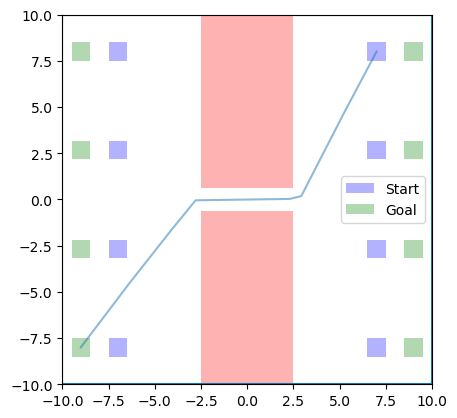

In [166]:
draw_env(env,paths = [path])
